# Clustering with K-Means

In [1]:
# Make better use of Jupyter Notebook cell width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [2]:
import pandas as pd
import numpy as np
import pickle

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import RobustScaler
from sklearn.cluster import KMeans

In [3]:
# suppress scientific notation
np.set_printoptions(suppress=True)

## Pre-processing for K-Means
Add to dataframe:  
1) number of complaints per company  
2) average word count of complaints, per company

#### 1) Add number of complaints per company

In [4]:
df_complaint_num = pd.read_pickle('df_complaint_num.pkl')
df_complaint_num.head()

,num_complaints,cum_sum,cum_perc
PORTFOLIO RECOVERY ASSOCIATES INC,900,900,4.12
ENCORE CAPITAL GROUP INC.,694,1594,7.30
Resurgent Capital Services L.P.,512,2106,9.65
CAPITAL ONE FINANCIAL CORPORATION,473,2579,11.81
ERC,418,2997,13.73


In [5]:
def num_complaints_per_company(df_complaint_num):
    df_complaint_num = df_complaint_num.rename_axis('Company').reset_index()
    df_complaint_num.sort_values(by=['Company'], inplace=True)
    complaints_per_company = df_complaint_num[['Company', 'num_complaints']]
    return complaints_per_company

In [6]:
complaints_per_company = num_complaints_per_company(df_complaint_num)
complaints_per_company

,Company,num_complaints
587,1st Franklin Financial Corporation,5
349,2288984 Ontario Inc.,9
1230,"3rd Generation, Inc.",1
1648,"4M Collections, LLC",1
1640,"A & A North American Financial, LLC",1
...,...,...
1085,"ZenResolve, LLC",2
1375,eCon Credit LP,1
827,"eMoneyUSA Holdings, LLC",3
805,"iQuantified Management Services, LLC",3


In [7]:
company_top_prob = pd.read_pickle('company_top_prob.pkl')
company_top_prob

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,topic_11,topic_12,topic_13,topic_14,topic_15,topic_16,topic_17,topic_18,topic_19
Company,,,,,,,,,,,,,,,,,,,,
"ACIMA CREDIT, LLC",0.000001,0.357143,0.428195,0.142858,0.356915,0.214286,0.277875,0.071429,0.000005,0.000002,0.531724,0.000001,1.000000e-06,0.290881,0.286787,0.439723,1.000000e-06,0.148562,0.344567,0.000969
AES/PHEAA,0.000001,0.464286,0.281508,0.053572,0.250094,0.214286,0.214982,0.250000,0.482576,0.000001,0.297766,0.144534,1.000000e-06,0.299323,0.141373,0.295638,7.143445e-02,0.200685,0.149157,0.215823
AFNI INC.,0.082570,0.137615,0.168184,0.238533,0.196649,0.376147,0.230811,0.155964,0.009246,0.018955,0.189477,0.110126,8.256964e-02,0.426620,0.216091,0.222741,7.339535e-02,0.277587,0.303640,0.373855
ALLY FINANCIAL INC.,0.111112,0.244445,0.148646,0.066668,0.133041,0.222223,0.422170,0.044445,0.047494,0.025315,0.266179,0.044627,1.000000e-06,0.207192,0.088685,0.201502,1.000000e-06,0.113988,0.128400,0.151483
"AMCOL Systems, Inc.",0.060607,0.090910,0.157752,0.060607,0.093054,0.272728,0.084689,0.151516,0.000003,0.497695,0.160451,0.030774,9.090991e-02,0.280312,0.106938,0.266755,6.060694e-02,0.277147,0.089983,0.284617
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Westlake Services, LLC",0.148149,0.185186,0.163579,0.074075,0.074151,0.222223,0.116777,0.222223,0.051184,0.000073,0.226124,0.074100,7.407493e-02,0.151396,0.111823,0.222889,7.407493e-02,0.125704,0.219354,0.170282
"Williams & Fudge, Inc",0.000002,0.375000,0.291950,0.041668,0.385793,0.083334,0.594284,0.041668,0.251496,0.000001,0.512023,0.125421,1.000000e-06,0.501086,0.151818,0.245006,4.159179e-02,0.049262,0.120947,0.755132
"Windham Professionals, Inc.",0.000001,0.076924,0.155120,0.153847,0.347486,0.000001,0.803863,0.000001,0.000003,0.076924,0.242175,0.230768,1.000000e-06,0.294979,0.230770,0.185806,1.000000e-06,0.079564,0.104992,0.466119


In [8]:
# add to company_top_prob dataframe a column for number of complaints per Company
company_top_prob_2 = pd.merge(company_top_prob, complaints_per_company, left_index=True, right_on='Company')
company_top_prob_2 = company_top_prob_2.set_index('Company')
company_top_prob_2

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,...,topic_11,topic_12,topic_13,topic_14,topic_15,topic_16,topic_17,topic_18,topic_19,num_complaints
Company,,,,,,,,,,,,,,,,,,,,,
"ACIMA CREDIT, LLC",0.000001,0.357143,0.428195,0.142858,0.356915,0.214286,0.277875,0.071429,0.000005,0.000002,...,0.000001,1.000000e-06,0.290881,0.286787,0.439723,1.000000e-06,0.148562,0.344567,0.000969,14
AES/PHEAA,0.000001,0.464286,0.281508,0.053572,0.250094,0.214286,0.214982,0.250000,0.482576,0.000001,...,0.144534,1.000000e-06,0.299323,0.141373,0.295638,7.143445e-02,0.200685,0.149157,0.215823,56
AFNI INC.,0.082570,0.137615,0.168184,0.238533,0.196649,0.376147,0.230811,0.155964,0.009246,0.018955,...,0.110126,8.256964e-02,0.426620,0.216091,0.222741,7.339535e-02,0.277587,0.303640,0.373855,109
ALLY FINANCIAL INC.,0.111112,0.244445,0.148646,0.066668,0.133041,0.222223,0.422170,0.044445,0.047494,0.025315,...,0.044627,1.000000e-06,0.207192,0.088685,0.201502,1.000000e-06,0.113988,0.128400,0.151483,45
"AMCOL Systems, Inc.",0.060607,0.090910,0.157752,0.060607,0.093054,0.272728,0.084689,0.151516,0.000003,0.497695,...,0.030774,9.090991e-02,0.280312,0.106938,0.266755,6.060694e-02,0.277147,0.089983,0.284617,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Westlake Services, LLC",0.148149,0.185186,0.163579,0.074075,0.074151,0.222223,0.116777,0.222223,0.051184,0.000073,...,0.074100,7.407493e-02,0.151396,0.111823,0.222889,7.407493e-02,0.125704,0.219354,0.170282,27
"Williams & Fudge, Inc",0.000002,0.375000,0.291950,0.041668,0.385793,0.083334,0.594284,0.041668,0.251496,0.000001,...,0.125421,1.000000e-06,0.501086,0.151818,0.245006,4.159179e-02,0.049262,0.120947,0.755132,24
"Windham Professionals, Inc.",0.000001,0.076924,0.155120,0.153847,0.347486,0.000001,0.803863,0.000001,0.000003,0.076924,...,0.230768,1.000000e-06,0.294979,0.230770,0.185806,1.000000e-06,0.079564,0.104992,0.466119,13


#### 2) Add average word count of complaints, per company

In [9]:
df_split = pd.read_pickle('df_split.pkl')
df_split

,orig_index,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,0,2020-05-07,Debt collection,Other debt,Attempts to collect debt not owed,Debt is not yours,I received an alert from XXXX XXXX on XX/XX/XX...,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",LA,700XX,None,Consent provided,Web,05/07/20,Closed with explanation,Yes,NaN,3642003
1,2,2020-02-11,Debt collection,Other debt,Took or threatened to take negative or legal a...,Seized or attempted to seize your property,See uploaded document dated XXXX ; CHASE BANK ...,None,JPMORGAN CHASE & CO.,GA,301XX,None,Consent provided,Web,02/11/20,Closed with explanation,Yes,NaN,3527527
2,3,2020-05-27,Debt collection,Other debt,Written notification about debt,Didn't receive enough information to verify debt,On XX/XX/XXXX I pulled my credit report and sa...,Company believes it acted appropriately as aut...,Monterey Financial Services LLC,NY,None,None,Consent provided,Web,05/27/20,Closed with explanation,Yes,NaN,3670227
3,4,2020-01-11,Debt collection,Other debt,Written notification about debt,Didn't receive notice of right to dispute,My XXXX ( XXXX ) Account number for Internet s...,None,AFNI INC.,FL,320XX,None,Consent provided,Web,01/11/20,Closed with explanation,Yes,NaN,3492864
4,5,2020-01-22,Debt collection,Medical debt,Took or threatened to take negative or legal a...,Threatened or suggested your credit would be d...,AMCOL Systems ( a debt collector ) reported a ...,None,"AMCOL Systems, Inc.",TX,775XX,None,Consent provided,Web,01/22/20,Closed with explanation,Yes,NaN,3504908
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18151,21825,2020-05-23,Debt collection,Other debt,Attempts to collect debt not owed,Debt is not yours,"I was made aware, that once again, XXXX XXXX c...",Company has responded to the consumer and the ...,The Receivable Management Services LLC,WV,258XX,None,Consent provided,Web,05/23/20,Closed with explanation,Yes,NaN,3666313
18152,21827,2020-05-03,Debt collection,Credit card debt,Attempts to collect debt not owed,Debt was paid,using Lowe 's Advantage card I made online fro...,Company has responded to the consumer and the ...,SYNCHRONY FINANCIAL,WA,981XX,None,Consent provided,Web,05/03/20,Closed with monetary relief,Yes,NaN,3635213
18153,21828,2020-04-05,Debt collection,Credit card debt,Took or threatened to take negative or legal a...,Threatened or suggested your credit would be d...,In XX/XX/XXXX I paid the full amount of my XXX...,None,Alliance Data Card Services,TX,None,None,Consent provided,Web,04/05/20,Closed with non-monetary relief,Yes,NaN,3593729
18154,21829,2020-03-28,Debt collection,Credit card debt,Took or threatened to take negative or legal a...,Threatened to sue you for very old debt,XX/XX/XXXX my sister called to inform me that ...,Company has responded to the consumer and the ...,WELLS FARGO & COMPANY,CA,934XX,None,Consent provided,Web,04/01/20,Closed with explanation,Yes,NaN,3584339


In [10]:
# count number of words in each document/narrative, put into a dictionary 
def word_count_each_doc(df_split):
    word_cnt_dict = {}
    for index, complaint in enumerate(df_split['Consumer complaint narrative']):
        word_cnt = len(str(complaint).split())
        word_cnt_dict[index] = word_cnt
    df_word_cnt = pd.DataFrame(word_cnt_dict.values(), columns = ['word_cnt'])
    return df_word_cnt

In [11]:
df_word_cnt = word_count_each_doc(df_split)
df_word_cnt

,word_cnt
0,130
1,118
2,339
3,423
4,98
...,...
18151,89
18152,314
18153,1087
18154,200


In [12]:
# add column for word count of each document: merge 'df_word_cnt' and df_split
df_split_2 = pd.merge(df_split, df_word_cnt, left_index=True, right_index=True)
df_split_2.head()

,orig_index,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID,word_cnt
0,0,2020-05-07,Debt collection,Other debt,Attempts to collect debt not owed,Debt is not yours,I received an alert from XXXX XXXX on XX/XX/XX...,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",LA,700XX,None,Consent provided,Web,05/07/20,Closed with explanation,Yes,NaN,3642003,130
1,2,2020-02-11,Debt collection,Other debt,Took or threatened to take negative or legal a...,Seized or attempted to seize your property,See uploaded document dated XXXX ; CHASE BANK ...,None,JPMORGAN CHASE & CO.,GA,301XX,None,Consent provided,Web,02/11/20,Closed with explanation,Yes,NaN,3527527,118
2,3,2020-05-27,Debt collection,Other debt,Written notification about debt,Didn't receive enough information to verify debt,On XX/XX/XXXX I pulled my credit report and sa...,Company believes it acted appropriately as aut...,Monterey Financial Services LLC,NY,None,None,Consent provided,Web,05/27/20,Closed with explanation,Yes,NaN,3670227,339
3,4,2020-01-11,Debt collection,Other debt,Written notification about debt,Didn't receive notice of right to dispute,My XXXX ( XXXX ) Account number for Internet s...,None,AFNI INC.,FL,320XX,None,Consent provided,Web,01/11/20,Closed with explanation,Yes,NaN,3492864,423
4,5,2020-01-22,Debt collection,Medical debt,Took or threatened to take negative or legal a...,Threatened or suggested your credit would be d...,AMCOL Systems ( a debt collector ) reported a ...,None,"AMCOL Systems, Inc.",TX,775XX,None,Consent provided,Web,01/22/20,Closed with explanation,Yes,NaN,3504908,98


In [13]:
# added column: was 19, now 20 columns
df_split_2.shape

(18156, 20)

In [14]:
# get average number of words in a document, per Company
def avg_word_count_per_company(df_split_2):
    # group dataframe by Company, get average word count of complaints on per Company basis, as integers
    avg_len_complaint_by_company = df_split_2.groupby('Company')['word_cnt'].agg(np.mean).astype(int)
    
    # put into dataframe
    avg_len_complaint_by_company = pd.DataFrame(avg_len_complaint_by_company)
    
    # rename column for average word count
    avg_len_complaint_by_company.rename(columns={'word_cnt':'avg_word_cnt'}, inplace=True)
    
    #reset index
    avg_len_complaint_by_company = avg_len_complaint_by_company.reset_index()
    
    return avg_len_complaint_by_company

In [15]:
avg_len_complaint_by_company = avg_word_count_per_company(df_split_2)
avg_len_complaint_by_company

,Company,avg_word_cnt
0,"ACIMA CREDIT, LLC",234
1,AES/PHEAA,175
2,AFNI INC.,156
3,ALLY FINANCIAL INC.,117
4,"AMCOL Systems, Inc.",116
...,...,...
332,"Westlake Services, LLC",133
333,"Williams & Fudge, Inc",298
334,"Windham Professionals, Inc.",162
335,World Acceptance Corporation,93


In [16]:
# add to company_top_prob_2 dataframe a column for average length of complaints by Company
company_top_prob_2 = pd.merge(company_top_prob_2, avg_len_complaint_by_company, left_index=True, right_on='Company')
company_top_prob_2 = company_top_prob_2.set_index('Company')
company_top_prob_2

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,...,topic_12,topic_13,topic_14,topic_15,topic_16,topic_17,topic_18,topic_19,num_complaints,avg_word_cnt
Company,,,,,,,,,,,,,,,,,,,,,
"ACIMA CREDIT, LLC",0.000001,0.357143,0.428195,0.142858,0.356915,0.214286,0.277875,0.071429,0.000005,0.000002,...,1.000000e-06,0.290881,0.286787,0.439723,1.000000e-06,0.148562,0.344567,0.000969,14,234
AES/PHEAA,0.000001,0.464286,0.281508,0.053572,0.250094,0.214286,0.214982,0.250000,0.482576,0.000001,...,1.000000e-06,0.299323,0.141373,0.295638,7.143445e-02,0.200685,0.149157,0.215823,56,175
AFNI INC.,0.082570,0.137615,0.168184,0.238533,0.196649,0.376147,0.230811,0.155964,0.009246,0.018955,...,8.256964e-02,0.426620,0.216091,0.222741,7.339535e-02,0.277587,0.303640,0.373855,109,156
ALLY FINANCIAL INC.,0.111112,0.244445,0.148646,0.066668,0.133041,0.222223,0.422170,0.044445,0.047494,0.025315,...,1.000000e-06,0.207192,0.088685,0.201502,1.000000e-06,0.113988,0.128400,0.151483,45,117
"AMCOL Systems, Inc.",0.060607,0.090910,0.157752,0.060607,0.093054,0.272728,0.084689,0.151516,0.000003,0.497695,...,9.090991e-02,0.280312,0.106938,0.266755,6.060694e-02,0.277147,0.089983,0.284617,33,116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Westlake Services, LLC",0.148149,0.185186,0.163579,0.074075,0.074151,0.222223,0.116777,0.222223,0.051184,0.000073,...,7.407493e-02,0.151396,0.111823,0.222889,7.407493e-02,0.125704,0.219354,0.170282,27,133
"Williams & Fudge, Inc",0.000002,0.375000,0.291950,0.041668,0.385793,0.083334,0.594284,0.041668,0.251496,0.000001,...,1.000000e-06,0.501086,0.151818,0.245006,4.159179e-02,0.049262,0.120947,0.755132,24,298
"Windham Professionals, Inc.",0.000001,0.076924,0.155120,0.153847,0.347486,0.000001,0.803863,0.000001,0.000003,0.076924,...,1.000000e-06,0.294979,0.230770,0.185806,1.000000e-06,0.079564,0.104992,0.466119,13,162


In [17]:
# pickle company_top_prob_2
# company_top_prob_2.to_pickle('company_top_prob_2.pkl')

## Rename topic numbers

In [18]:
company_top_prob_3 = company_top_prob_2.rename({'topic_0': 'fcra_fdcpa_0', 'topic_1': 'payment_arrangement_1',
                                               'topic_2': 'interest_fees_2', 'topic_3': 'verify_request_3',
                                               'topic_4': 'representative_4', 'topic_5': 'credit_report_5',
                                               'topic_6': 'harassment_6', 'topic_7': 'identity_theft_7',
                                               'topic_8': 'wage_garnish_8', 'topic_9': 'medical_debt_9',
                                               'topic_10': 'generic_10', 'topic_11': 'statute_limitation_11',
                                               'topic_12': 'generic_12', 'topic_13': 'letter_13',
                                               'topic_14': 'generic_14', 'topic_15': 'credit_card_15',
                                               'topic_16': 'generic_16', 'topic_17': 'generic_17',
                                               'topic_18': 'police_report_18','topic_19': 'debt_collection_19'}, 
                                               axis=1)
company_top_prob_3

,fcra_fdcpa_0,payment_arrangement_1,interest_fees_2,verify_request_3,representative_4,credit_report_5,harassment_6,identity_theft_7,wage_garnish_8,medical_debt_9,...,generic_12,letter_13,generic_14,credit_card_15,generic_16,generic_17,police_report_18,debt_collection_19,num_complaints,avg_word_cnt
Company,,,,,,,,,,,,,,,,,,,,,
"ACIMA CREDIT, LLC",0.000001,0.357143,0.428195,0.142858,0.356915,0.214286,0.277875,0.071429,0.000005,0.000002,...,1.000000e-06,0.290881,0.286787,0.439723,1.000000e-06,0.148562,0.344567,0.000969,14,234
AES/PHEAA,0.000001,0.464286,0.281508,0.053572,0.250094,0.214286,0.214982,0.250000,0.482576,0.000001,...,1.000000e-06,0.299323,0.141373,0.295638,7.143445e-02,0.200685,0.149157,0.215823,56,175
AFNI INC.,0.082570,0.137615,0.168184,0.238533,0.196649,0.376147,0.230811,0.155964,0.009246,0.018955,...,8.256964e-02,0.426620,0.216091,0.222741,7.339535e-02,0.277587,0.303640,0.373855,109,156
ALLY FINANCIAL INC.,0.111112,0.244445,0.148646,0.066668,0.133041,0.222223,0.422170,0.044445,0.047494,0.025315,...,1.000000e-06,0.207192,0.088685,0.201502,1.000000e-06,0.113988,0.128400,0.151483,45,117
"AMCOL Systems, Inc.",0.060607,0.090910,0.157752,0.060607,0.093054,0.272728,0.084689,0.151516,0.000003,0.497695,...,9.090991e-02,0.280312,0.106938,0.266755,6.060694e-02,0.277147,0.089983,0.284617,33,116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Westlake Services, LLC",0.148149,0.185186,0.163579,0.074075,0.074151,0.222223,0.116777,0.222223,0.051184,0.000073,...,7.407493e-02,0.151396,0.111823,0.222889,7.407493e-02,0.125704,0.219354,0.170282,27,133
"Williams & Fudge, Inc",0.000002,0.375000,0.291950,0.041668,0.385793,0.083334,0.594284,0.041668,0.251496,0.000001,...,1.000000e-06,0.501086,0.151818,0.245006,4.159179e-02,0.049262,0.120947,0.755132,24,298
"Windham Professionals, Inc.",0.000001,0.076924,0.155120,0.153847,0.347486,0.000001,0.803863,0.000001,0.000003,0.076924,...,1.000000e-06,0.294979,0.230770,0.185806,1.000000e-06,0.079564,0.104992,0.466119,13,162


In [19]:
# pickle company_top_prob_3
# company_top_prob_3.to_pickle('company_top_prob_3.pkl')

## Create company-topic-probability matrix for clustering 

In [20]:
# drop topics that don't appear meaningful for clustering
company_top_prob_3 = company_top_prob_3.drop(['generic_10', 'generic_12', 'generic_14', 
                                              'credit_card_15', 'generic_16', 'generic_17'], 1)
company_top_prob_3

,fcra_fdcpa_0,payment_arrangement_1,interest_fees_2,verify_request_3,representative_4,credit_report_5,harassment_6,identity_theft_7,wage_garnish_8,medical_debt_9,statute_limitation_11,letter_13,police_report_18,debt_collection_19,num_complaints,avg_word_cnt
Company,,,,,,,,,,,,,,,,
"ACIMA CREDIT, LLC",0.000001,0.357143,0.428195,0.142858,0.356915,0.214286,0.277875,0.071429,0.000005,0.000002,0.000001,0.290881,0.344567,0.000969,14,234
AES/PHEAA,0.000001,0.464286,0.281508,0.053572,0.250094,0.214286,0.214982,0.250000,0.482576,0.000001,0.144534,0.299323,0.149157,0.215823,56,175
AFNI INC.,0.082570,0.137615,0.168184,0.238533,0.196649,0.376147,0.230811,0.155964,0.009246,0.018955,0.110126,0.426620,0.303640,0.373855,109,156
ALLY FINANCIAL INC.,0.111112,0.244445,0.148646,0.066668,0.133041,0.222223,0.422170,0.044445,0.047494,0.025315,0.044627,0.207192,0.128400,0.151483,45,117
"AMCOL Systems, Inc.",0.060607,0.090910,0.157752,0.060607,0.093054,0.272728,0.084689,0.151516,0.000003,0.497695,0.030774,0.280312,0.089983,0.284617,33,116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Westlake Services, LLC",0.148149,0.185186,0.163579,0.074075,0.074151,0.222223,0.116777,0.222223,0.051184,0.000073,0.074100,0.151396,0.219354,0.170282,27,133
"Williams & Fudge, Inc",0.000002,0.375000,0.291950,0.041668,0.385793,0.083334,0.594284,0.041668,0.251496,0.000001,0.125421,0.501086,0.120947,0.755132,24,298
"Windham Professionals, Inc.",0.000001,0.076924,0.155120,0.153847,0.347486,0.000001,0.803863,0.000001,0.000003,0.076924,0.230768,0.294979,0.104992,0.466119,13,162


In [21]:
X = company_top_prob_3
columns = X.columns

In [22]:
X = np.array(X)

## Determine optimum number of clusters for K-Means
- plot inertia: sum of squared distances of samples to their closest cluster center

In [23]:
rscale = RobustScaler() # shrinks range to between 0-1 using interquartile range so is robust to outliers
X_scaled = rscale.fit_transform(X)

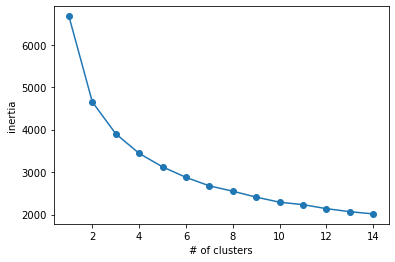

In [24]:
inertia = []
list_num_clusters = list(range(1,15))
for num_clusters in list_num_clusters:
    km = KMeans(n_clusters = num_clusters)
    km.fit(X_scaled)
    inertia.append(km.inertia_)
    
plt.plot(list_num_clusters, inertia)
plt.scatter(list_num_clusters, inertia)
plt.xlabel('# of clusters')
plt.ylabel('inertia');

# Clustering!

In [25]:
k = 6
km = KMeans(n_clusters=k, random_state=52)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=52, tol=0.0001, verbose=0)

In [26]:
km.inertia_

532941.020742419

In [27]:
km.cluster_centers_.round(3)

array([[  0.064,   0.18 ,   0.176,   0.123,   0.178,   0.277,   0.277,
          0.098,   0.092,   0.131,   0.077,   0.333,   0.186,   0.274,
         24.51 , 133.974],
       [  0.08 ,   0.155,   0.196,   0.14 ,   0.168,   0.321,   0.201,
          0.111,   0.062,   0.044,   0.098,   0.346,   0.28 ,   0.281,
        336.867, 151.667],
       [  0.066,   0.18 ,   0.199,   0.158,   0.129,   0.28 ,   0.33 ,
          0.079,   0.156,   0.014,   0.124,   0.331,   0.229,   0.267,
        797.   , 156.5  ],
       [  0.09 ,   0.335,   0.437,   0.106,   0.357,   0.174,   0.415,
          0.087,   0.576,   0.041,   0.291,   0.475,   0.287,   0.445,
         20.391, 318.913],
       [  0.09 ,   0.179,   0.211,   0.155,   0.207,   0.333,   0.24 ,
          0.079,   0.084,   0.127,   0.109,   0.368,   0.233,   0.331,
        124.316, 168.684],
       [  0.076,   0.241,   0.295,   0.152,   0.278,   0.253,   0.341,
          0.066,   0.217,   0.105,   0.163,   0.451,   0.251,   0.376,
         24.2

In [28]:
# for looking at cluster centers in CSV file
# pd.DataFrame(km.cluster_centers_.round(3)).to_csv("km_cluster_centers_.csv", header = columns)

In [29]:
cluster_labels = list(label for label in km.labels_)
company_top_prob_3['cluster_labels'] = cluster_labels
company_top_prob_3

,fcra_fdcpa_0,payment_arrangement_1,interest_fees_2,verify_request_3,representative_4,credit_report_5,harassment_6,identity_theft_7,wage_garnish_8,medical_debt_9,statute_limitation_11,letter_13,police_report_18,debt_collection_19,num_complaints,avg_word_cnt,cluster_labels
Company,,,,,,,,,,,,,,,,,
"ACIMA CREDIT, LLC",0.000001,0.357143,0.428195,0.142858,0.356915,0.214286,0.277875,0.071429,0.000005,0.000002,0.000001,0.290881,0.344567,0.000969,14,234,5
AES/PHEAA,0.000001,0.464286,0.281508,0.053572,0.250094,0.214286,0.214982,0.250000,0.482576,0.000001,0.144534,0.299323,0.149157,0.215823,56,175,5
AFNI INC.,0.082570,0.137615,0.168184,0.238533,0.196649,0.376147,0.230811,0.155964,0.009246,0.018955,0.110126,0.426620,0.303640,0.373855,109,156,4
ALLY FINANCIAL INC.,0.111112,0.244445,0.148646,0.066668,0.133041,0.222223,0.422170,0.044445,0.047494,0.025315,0.044627,0.207192,0.128400,0.151483,45,117,0
"AMCOL Systems, Inc.",0.060607,0.090910,0.157752,0.060607,0.093054,0.272728,0.084689,0.151516,0.000003,0.497695,0.030774,0.280312,0.089983,0.284617,33,116,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Westlake Services, LLC",0.148149,0.185186,0.163579,0.074075,0.074151,0.222223,0.116777,0.222223,0.051184,0.000073,0.074100,0.151396,0.219354,0.170282,27,133,0
"Williams & Fudge, Inc",0.000002,0.375000,0.291950,0.041668,0.385793,0.083334,0.594284,0.041668,0.251496,0.000001,0.125421,0.501086,0.120947,0.755132,24,298,3
"Windham Professionals, Inc.",0.000001,0.076924,0.155120,0.153847,0.347486,0.000001,0.803863,0.000001,0.000003,0.076924,0.230768,0.294979,0.104992,0.466119,13,162,0


In [30]:
# how many companies in each cluster?
company_top_prob_3['cluster_labels'].value_counts()

0    155
5    104
4     38
3     23
1     15
2      2
Name: cluster_labels, dtype: int64

In [31]:
# pickle company_top_prob_3 to use in notebook #4: PCA
# company_top_prob_3.to_pickle('company_top_prob_4.pkl')